In [1]:
1+1

2

#K-Fold Cross Validation :K 

In [2]:
import pandas as pd
from  sklearn import svm, metrics, model_selection
import random, re

In [3]:
csv = pd.read_csv('iris.csv')

In [4]:
data = csv[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
label = csv['Name']

#크로스 밸리데이션

In [5]:
clf = svm.SVC()
scores = model_selection.cross_val_score( clf, data, label, cv=5 )
print("정답률:", scores)
print()
print("평균정답률:", scores.mean())

정답률: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]

평균정답률: 0.9666666666666666


#실습 :KNN

In [6]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [7]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

zip()

In [8]:
a = [1,2,3,4,5]
b = ['a','b','c','d','e']

In [9]:
zip(a,b)

In [10]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e')]

In [11]:
list(zip(bream_length, bream_weight))

[(25.4, 242.0),
 (26.3, 290.0),
 (26.5, 340.0),
 (29.0, 363.0),
 (29.0, 430.0),
 (29.7, 450.0),
 (29.7, 500.0),
 (30.0, 390.0),
 (30.0, 450.0),
 (30.7, 500.0),
 (31.0, 475.0),
 (31.0, 500.0),
 (31.5, 500.0),
 (32.0, 340.0),
 (32.0, 600.0),
 (32.0, 600.0),
 (33.0, 700.0),
 (33.0, 700.0),
 (33.5, 610.0),
 (33.5, 650.0),
 (34.0, 575.0),
 (34.0, 685.0),
 (34.5, 620.0),
 (35.0, 680.0),
 (35.0, 700.0),
 (35.0, 725.0),
 (35.0, 720.0),
 (36.0, 714.0),
 (36.0, 850.0),
 (37.0, 1000.0),
 (38.5, 920.0),
 (38.5, 955.0),
 (39.5, 925.0),
 (41.0, 975.0),
 (41.0, 950.0)]

##도미데이터 시각화
1. matplotlib
2. seaborn

In [12]:
!pip install matplotlib

In [13]:
!pip install seaborn

-1

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'weight')

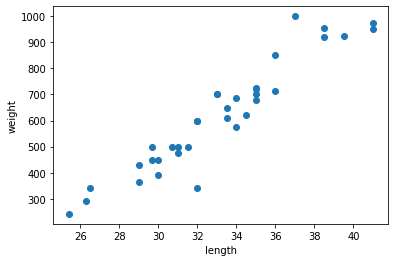

In [15]:
plt.scatter( bream_length, bream_weight ) #축 지정 
plt.xlabel('length') 
plt.ylabel('weight')

Text(0, 0.5, 'weight')

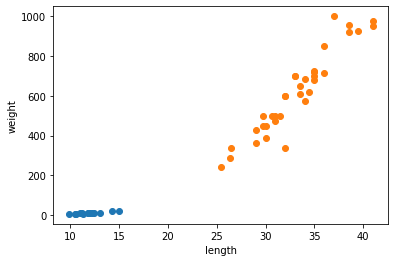

In [16]:
plt.scatter( smelt_length, smelt_weight)
plt.scatter( bream_length, bream_weight ) #축 지정 
plt.xlabel('length')
plt.ylabel('weight')

In [17]:
length =  bream_length + smelt_length
weight =  bream_weight + smelt_weight

In [18]:
#도미 35마리 빙어 14마리
fish_data = []

-1 알고리즘

In [19]:
for i, w in zip( length, weight):
    print(i,w)

25.4 242.0
26.3 290.0
26.5 340.0
29.0 363.0
29.0 430.0
29.7 450.0
29.7 500.0
30.0 390.0
30.0 450.0
30.7 500.0
31.0 475.0
31.0 500.0
31.5 500.0
32.0 340.0
32.0 600.0
32.0 600.0
33.0 700.0
33.0 700.0
33.5 610.0
33.5 650.0
34.0 575.0
34.0 685.0
34.5 620.0
35.0 680.0
35.0 700.0
35.0 725.0
35.0 720.0
36.0 714.0
36.0 850.0
37.0 1000.0
38.5 920.0
38.5 955.0
39.5 925.0
41.0 975.0
41.0 950.0
9.8 6.7
10.5 7.5
10.6 7.0
11.0 9.7
11.2 9.8
11.3 8.7
11.8 10.0
11.8 9.9
12.0 9.8
12.2 12.2
12.4 13.4
13.0 12.2
14.3 19.7
15.0 19.9


## fish_data의 정답 레이블을 생성한다.
- 위에서 순서대로 35개의 데이터는 도리를 의미하고 ( 도미 =1 )
- 나머지 14개

In [20]:
fish_target = [1]*35+[0]*14
print( fish_target )

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
fish_data =[[l, w] for l, w in zip(length, weight)]

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# 알고리즘 객체 생성

In [23]:
kn = KNeighborsClassifier()

# 학습모델링 : fit( 학습용 데이엍 , 학습용 데이터의 정답 )

In [24]:
kn.fit( fish_data, fish_target)

KNeighborsClassifier()

In [25]:
kn.score( fish_data, fish_target )

1.0

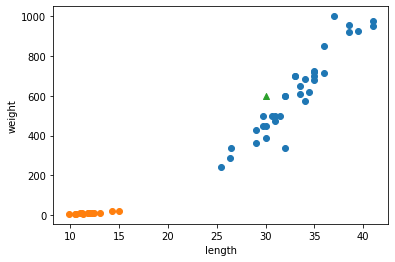

In [26]:
plt.scatter(bream_length, bream_weight)
plt.scatter( smelt_length, smelt_weight)
plt.scatter( 30,600, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- [ 1차원 데이터 ]
- [ 2차원 데이터 ] --> 열이 2개이상인 테이터 

In [27]:
kn.predict([[30,600]])

array([1])

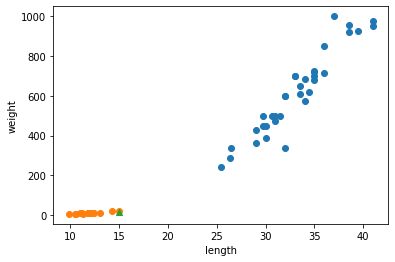

In [28]:
plt.scatter(bream_length, bream_weight)
plt.scatter( smelt_length, smelt_weight)
plt.scatter( 15,15, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
kn.predict([[10,15]])

array([0])

- 모든 데이터를 학습시키고 정답을 예측하는 경우 

In [30]:
kn49 = KNeighborsClassifier( n_neighbors=49)

In [31]:
kn49.fit( fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [32]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [33]:
35/49

0.7142857142857143

## 교재 64 페이지

In [34]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
for n in range( 5, 50 ):
    kn.n_neighbors = n
    score = kn.score( fish_data, fish_target )
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939


# NBA 선수 포지션 분석

In [35]:
!dir basketball_stat.csv

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FAC8-95B4

 D:\python 디렉터리

2020-03-07  오후 04:29             4,086 basketball_stat.csv
               1개 파일               4,086 바이트
               0개 디렉터리  206,178,549,760 바이트 남음


In [36]:
%pwd

'D:\\python'

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('basketball_stat.csv')
df.head() # 처음부터 5줄만 확인 
# head() 괄호안에 숫자를 지정하면 지정한 만큼의 라인을 출력한다. 

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [39]:
df.tail()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1
99,Lou Williams,SG,2.0,3.3,2.5,3.0,1.0,0.2


In [40]:
# 1차원 데이터 -> series() 
# 2차원 데이터 -> DataFrame() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [41]:
df = pd.read_csv('titanic.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 특정 필드(열) 의 특정별 카운트 세기 

In [44]:
df = pd.read_csv('basketball_stat.csv')

In [45]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

# 선수 포지션 선택

### 조건
1. 슈팅 가드 : 3점슛( 3p) 
2. 센터      :  블러킹 ( BLK ) 리바운드( TRB ) 

## 가설에 대한 조건이 맞는지 데이터를 시각화

Text(0.5, 1.0, 'STL & 2P in 2D Plane')

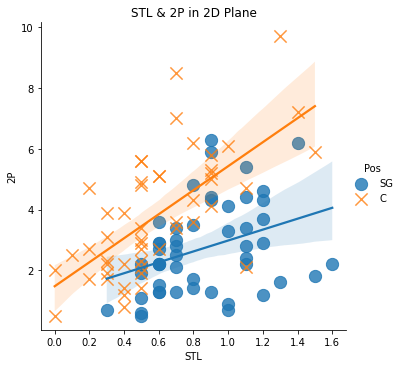

In [46]:
 import matplotlib.pyplot as plt
 import seaborn as sns 
# 2점슛( 2P)과 가로채기 (STL )의 데이터 시각화 
sns.lmplot( x='STL', y='2P', data=df, fit_reg=True, # 결정 경계선 출력
          scatter_kws={'s':150 }, # 좌표상의 점의 크기
          markers =['o','x'],  # 점의 모양
          hue = 'Pos' # 예측값( 범례 )
          )  
plt.title('STL & 2P in 2D Plane') #제목설정 

Text(0.5, 1.0, 'STL & 2P in 2D Plane')

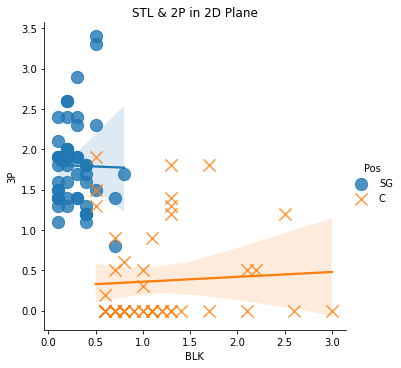

In [47]:
 import matplotlib.pyplot as plt
 import seaborn as sns 
# 3점슛( 3P)과 가로채기 (STL )의 데이터 시각화 
sns.lmplot( x='BLK', y='3P', data=df, fit_reg=True, # 결정 경계선 출력
          scatter_kws={'s':150 }, # 좌표상의 점의 크기
          markers =['o','x'],  # 점의 모양
          hue = 'Pos' # 예측값( 범례 )
          )  
plt.title('STL & 2P in 2D Plane') #제목설정 

In [48]:
!pip install seaborn

# 전체 데이터 시각화 비교

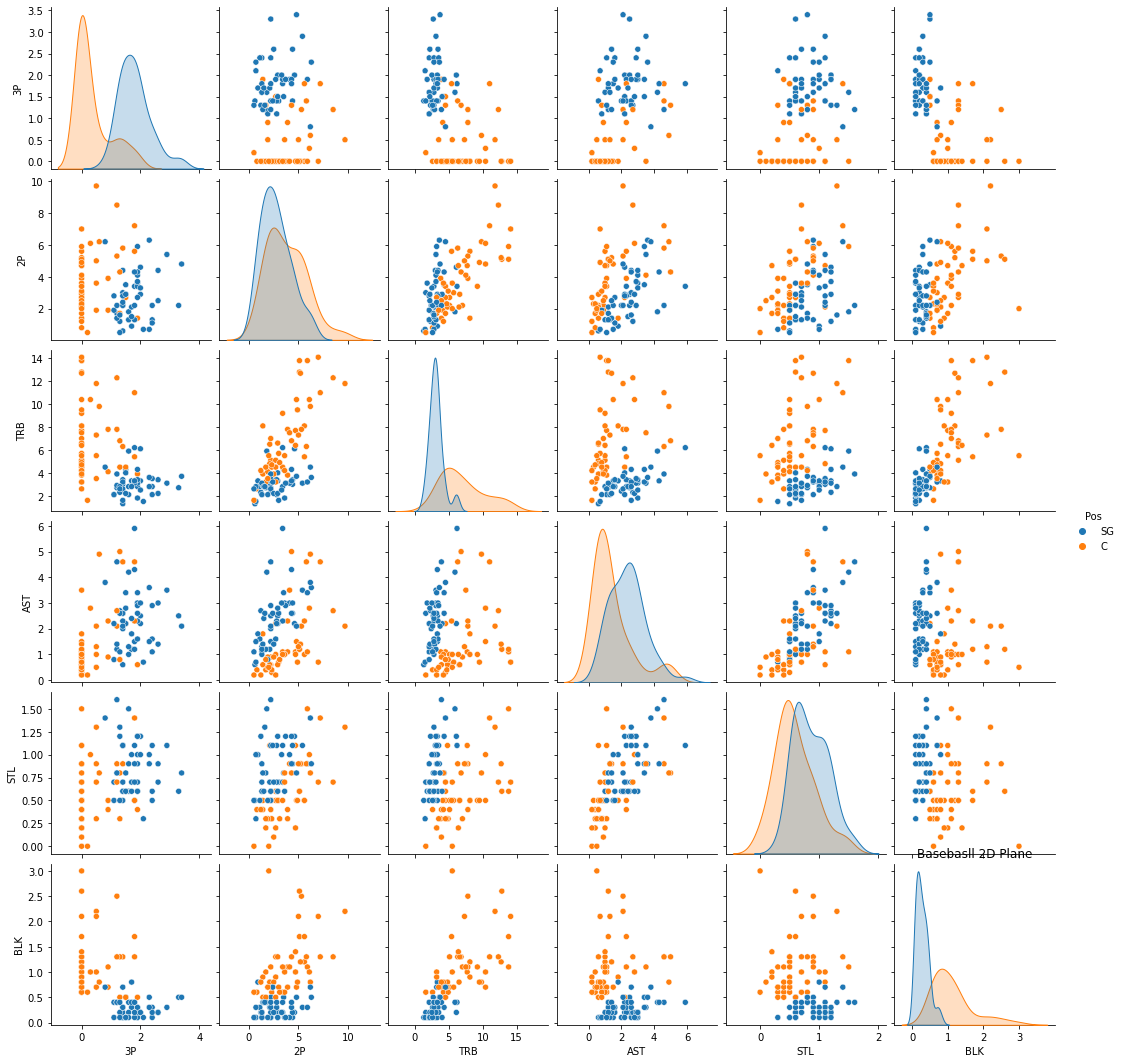

In [49]:
sns.pairplot( data=df, hue='Pos')
plt.title("Basebasll 2D Plane")
plt.show()

In [50]:
# 삭제하는 구문은 1번만 실행한다.
df.drop(['2P','AST'.'STL'], axis=1, inplace=True)

SyntaxError: invalid syntax (Temp/ipykernel_7432/1009024092.py, line 2)

In [51]:
# 삭제하는 구문은 1번만 실행한다.
df.drop(['2P','AST','STL'], axis=1, inplace=True) # 즉시 적용

### axis = 0 : 각열의 모든 행에 대하여서 적용된다. 
- drop: 각 열의 행을 지운다.
- mean : 각 열의 행들의 평균을 구한다. 
- rank : 각 열의 행들의 순위를 구한다.

### axis = 1 : 각열의 모든 행에 대하여서 적용된다.
- drop: 각 행의 열을 지운다.
- mean : 각 행의 열들의 평균을 구한다.
- rank : 각 행의 열들의 순위를 구한다.

In [52]:
# 결과 : 센터와 슈팅가드를 구분할수 있는 
df.head()


,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


# 학습용 데이터& 테스트용 데이터 분류 

 - 옵션을 사용하지 않으면 기본값으로 75% /25%로 분류한다. 
 - 사용자가 옵션을 설정할 수 있다. 

In [53]:
# 모듈 호출 
from sklearn.model_selection import train_test_split

In [54]:
# 데이터 분류 
train, test = train_test_split( df, test_size=0.2)
#train, test = train_test_split( df)

In [55]:
# 학습용 데이터 확인 
train.shape[0]

80

In [56]:
#   테스트용 데이터 확인 
test.shape[0]

20

## 여기까지 작업한 데이터를 추후 작업을 위해 저장 

In [57]:
# 다듬어진 데이터를 파일로 저장한다.
#pickle.dump -> 데이터를 백업하는 경우 
import pickle
with open('basketball_train.pkl','wb') as train_data:
    pickle.dump(train, train_data)
    
with open('basketball_tet.pkl','wb') as train_data:
    pickle.dump(test, train_data)

In [58]:
!dir basketball_tet.pkl

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FAC8-95B4

 D:\python 디렉터리

2021-11-14  오전 10:29             1,858 basketball_tet.pkl
               1개 파일               1,858 바이트
               0개 디렉터리  206,178,545,664 바이트 남음


In [59]:
!mv basketball_tet.pkl basketball_test.pkl

'mv'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [60]:
!cp basketball_tet.pkl basketball_test.pkl

'cp'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# 선수 포지션 예측

In [61]:
import  pandas as pd
import  pickle 
import  matplotlib.pyplot as plt
import  seaborn as sns
import  numpy as np 

# 몇번 작업을 하던지 동일한 값으로 진핸핟. 
np.random.seed(5) 

In [62]:
# knn 모듈 호출 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 K값을 찾기 위한 교차 검증 
max_K_range = train.shape[0] // 2 
k_list = []

# k의 범위를 3부터 max_k_range( 학습데이터 중간)까지 진행 
for i in range( 3 , max_K_range, 2 ):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']] # 학습용 데어터
y_train = train[['Pos']] # 학습용 정답

#교차검증 
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score( knn, x_train, y_train.values.ravel(),
                            cv =10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
print( cross_validation_scores )

[0.8625, 0.8625, 0.8625, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.875, 0.8875, 0.875, 0.875, 0.875, 0.875, 0.8625, 0.8625, 0.85, 0.85, 0.85]


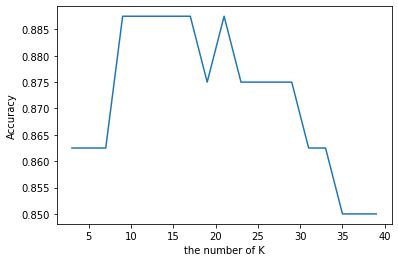

In [87]:
# K 에 따흔 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of K')
plt.ylabel('Accuracy')
plt.show()

# 예측율이 가장 높은 K선정

In [81]:
cvs = cross_validation_scores
k = k_list[cvs.index( max(cross_validation_scores))]
print("The Best Number of K:" + str(k))

The Best Number of K:9


In [86]:
#모듈 호출
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier( n_neighbors=k)
# 학습에 사용할 속성값 선언
x_train = train[['3P','BLK']]
# 예측할 대상 으로 표지션으로 지정 80개 정답
y_train = train[['Pos']]

#학스 시킬 모델 알고리즘 선택 
knn.fit( x_train, y_train.values.ravel())

#테스트데이터에서 분류를 위해 사용될 속성 지정 
x_test = test[['3P', 'BLK']]

# 테스트 데이터에 대한 정답 : 20개의 데이터
y_test = test[['Pos']]

#에측시작 
predict = knn.predict( x_test )

In [83]:
print( predict)

['SG' 'C' 'SG' 'SG' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'SG' 'SG' 'C' 'SG'
 'SG' 'C' 'C' 'C']


- 위의 결과에 대한 정확도를 계산한다.

In [72]:
print("정확도:" + str( accuracy_score( y_test.values.ravel(),predict )))

정확도:1.0


## 실제값과 예측값 비교

In [85]:
comparison = pd.DataFrame(
    {'prediction': predict,
      'ground_truth': y_test.values.ravel() }
)
comparison 
#  

,prediction,ground_truth
0,SG,SG
1,C,C
2,SG,SG
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,C
8,C,C
9,SG,C


   # 3개의 특징으로 예측하기 : 3P BLK TRB

In [84]:
#모듈 호출
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier( n_neighbors=k)
# 학습에 사용할 속성값 선언
x_train = train[['3P','BLK','TRB']]
# 예측할 대상 으로 표지션으로 지정 80개 정답
y_train = train[['Pos']]

#학스 시킬 모델 알고리즘 선택 
knn.fit( x_train, y_train.values.ravel())

#테스트데이터에서 분류를 위해 사용될 속성 지정 
x_test = test[['3P', 'BLK','TRB']]

# 테스트 데이터에 대한 정답 : 20개의 데이터
y_test = test[['Pos']]

#에측시작 
predict = knn.predict( x_test )
comparison = pd.DataFrame(
    {'prediction': predict,
      'ground_truth': y_test.values.ravel() }
)
print( '--------------------------------------------------------' )
print( comparison )
print( '--------------------------------------------------------' )
#
print("정확도:" + str( accuracy_score( y_test.values.ravel(),predict )))

--------------------------------------------------------
   prediction ground_truth
0          SG           SG
1           C            C
2          SG           SG
3          SG           SG
4           C            C
5           C            C
6           C            C
7          SG            C
8           C            C
9          SG            C
10          C            C
11          C            C
12         SG           SG
13          C           SG
14         SG            C
15         SG           SG
16         SG           SG
17          C            C
18          C            C
19          C            C
--------------------------------------------------------
정확도:0.8
